<a href="https://colab.research.google.com/github/ShubhamJadhav03/DeepLearning/blob/main/GpuVsCpuBenchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.18.0'

In [4]:
tf.test.is_built_with_cuda()

True

In [6]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Data Visualization

In [12]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

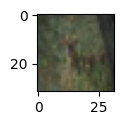

In [14]:
plot_sample(10)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
classes[y_train[2][0]]

'truck'

Preporcessing

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [24]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)  # Remove dtype='float32'
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)  # Remove dtype='float32'

# If you need to specifically set the data type to float32, you can do it afterwards:
y_train_categorical = y_train_categorical.astype('float32')
y_test_categorical = y_test_categorical.astype('float32')

In [25]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3074 - loss: 1.9288


In [26]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


3

In [27]:
y_test[0]

array([3], dtype=uint8)

In [31]:
def get_model():
  model = keras.Sequential([
          keras.layers.Flatten(input_shape=(32,32,3)),
          keras.layers.Dense(3000, activation='relu'),
          keras.layers.Dense(1000, activation='relu'),
          keras.layers.Dense(10, activation='sigmoid')
      ])

  model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

Measure training time on a CPU

In [32]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.3055 - loss: 1.9282
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Lets measure training time on a GPU

In [34]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3059 - loss: 1.9234
12.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


 same test for 10 epocs

In [35]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.3036 - loss: 1.9291
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 74ms/step - accuracy: 0.4188 - loss: 1.6498
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 74ms/step - accuracy: 0.4541 - loss: 1.5516
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.4766 - loss: 1.4835
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 73ms/step - accuracy: 0.4914 - loss: 1.4403
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.5128 - loss: 1.3940
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.5255 - loss: 1.3556
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 72ms/step - accuracy: 0.5404 - loss: 1.3109
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 75ms/step - accuracy: 0.5516 - loss: 1.2793
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.5627 - loss: 1.2516
21min 53s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [36]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3074 - loss: 1.9311
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4196 - loss: 1.6465
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4482 - loss: 1.5568
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4771 - loss: 1.4890
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4940 - loss: 1.4398
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5166 - loss: 1.3872
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5268 - loss: 1.3546
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5378 - loss: 1.3116
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5463 - loss: 1.2865
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5630 - loss: 1.2515
1min ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
